In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [2]:
D_path = glob.glob('Data\Dyslexic' + "\*")
C_path = glob.glob('Data\Control' + "\*")

C_data = []
for path in C_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    C_data.append(temp)

D_data = []
for path in D_path:
    temp = pd.read_csv(path)
    temp = temp.drop('Unnamed: 0',axis = 1)
    D_data.append(temp)

In [3]:
data = C_data[0]
data

,T,LX,LY,RX,RY
0,0.0,0.00000,0.00000,0.00000,0.00000
1,20.0,0.65535,-0.00001,0.65536,-0.65536
2,40.0,0.65534,-0.00001,0.65536,-0.65536
3,60.0,0.65534,-0.00001,0.65535,-0.65536
4,80.0,0.65534,-0.00001,0.65534,0.00000
...,...,...,...,...,...
1494,29880.0,103.54872,37.35520,104.85945,36.69984
1495,29900.0,105.51480,36.04447,106.17018,32.76765
1496,29920.0,107.48088,27.52472,108.79159,14.41743
1497,29940.0,108.13612,-16.38473,102.89310,-78.64416


In [6]:
X =data[['LX','RX']]

Y =data[['LY','RY']]

#df = pd.DataFrame([data['T'],X,Y], columns = ['T','X', 'Y'])

In [7]:
Xm = X.mean(axis=1)
Ym = Y.mean(axis=1)

In [13]:
Xm

0         0.000000
1         0.655355
2         0.655350
3         0.655345
4         0.655340
           ...    
1494    104.204085
1495    105.842490
1496    108.136235
1497    105.514610
1498    109.447325
Length: 1499, dtype: float64

In [19]:
Ym

0         0.000000
1        -0.327685
2        -0.327685
3        -0.327685
4        -0.000005
           ...    
1494     37.027520
1495     34.406060
1496     20.971075
1497    -47.514445
1498   -145.490390
Length: 1499, dtype: float64

In [8]:
f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
f = f.transpose()
f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
f

,T,X,Y
0,0.0,0.000000,0.000000
1,20.0,0.655355,-0.327685
2,40.0,0.655350,-0.327685
3,60.0,0.655345,-0.327685
4,80.0,0.655340,-0.000005
...,...,...,...
1494,29880.0,104.204085,37.027520
1495,29900.0,105.842490,34.406060
1496,29920.0,108.136235,20.971075
1497,29940.0,105.514610,-47.514445


In [9]:
C_new = []
for data in C_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    C_new.append(f)

In [10]:
D_new = []
for data in D_data:
    X =data[['LX','RX']]
    Y =data[['LY','RY']]
    Xm = X.mean(axis=1)
    Ym = Y.mean(axis=1)
    f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
    f = f.transpose()
    f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
    D_new.append(f)

In [11]:
trial = C_new[0]

In [12]:
x = trial['X']
y = trial['Y']
t = trial['T']

In [13]:
N = x.size

In [14]:
z=[]
for i in range(0,x.size):
    z.append(complex(x[i],y[i]))

In [15]:
Z = np.fft.fft(z)

In [16]:
fft_im=[]
fft_r =[]
for a in Z:
    fft_im.append(a.imag)
    fft_r.append(a.real)

C:\Python\Python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


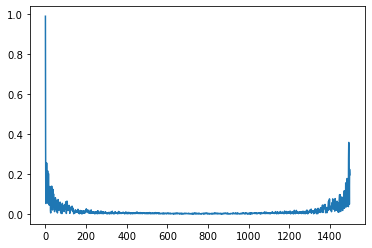

In [17]:
plt.plot(abs(Z)/max(Z))

In [18]:
Z_norm = abs(Z)

In [19]:
Z_norm = Z_norm/ max(Z_norm)


In [57]:
max_C =[]
max_D =[]
for i in range(len(C_new)):
    max_C.append(len(C_new[i]))
for i in range(len(D_new)):
    max_D.append(len(D_new[i]))
print(set(max_C))
print(set(max_D))

{1249, 999, 1999, 1749, 1499}
{1499, 1999}


In [21]:
k = int((len(Z_norm) + 1)/250)
N = 17
bins  = k*50
steps = int((int((len(Z_norm) + 1))- bins)/(N-1))
binval=[]
for a in range(0,(len(Z_norm) + 1)-(bins), steps):
    binval = np.append(binval, sum(np.abs(Z_norm[a:a+bins])))
  
    

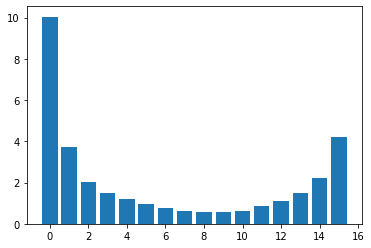

In [22]:
bin_xn = binval.tolist()
ht = bin_xn
ind = list(range(len(ht)))
plt.bar(ind, ht)
plt.show()

In [26]:
C_bins = []
for k in range(5):
    dat = C_new[k]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    Z = np.fft.fft(z)
    fft_im=[]
    fft_r =[]
    for a in Z:
        fft_im.append(a.imag)
        fft_r.append(a.real)
        
    Z_norm = abs(Z)/ max(Z_norm)
    
    N = int((len(Z_norm) + 1)/250)
    bins = N*50
    steps = N*10
    bin_val=[]
    for a in range(0,(len(Z_norm) + 1)-(bins), steps):
        bin_val = np.append(bin_val, sum(np.abs(Z_norm[a:a+bins])))
    bin_val = bin_val/(max(bin_val))
    C_bins.append(bin_val.tolist())


In [29]:
D_bins = []
for k in range(5):
    dat = D_new[k]
    x = dat['X']
    y = dat['Y']
    t = dat['T']
    
    z=[]
    for i in range(0,x.size):
        z.append(complex(x[i],y[i]))
    Z = np.fft.fft(z)
    fft_im=[]
    fft_r =[]
    for a in Z:
        fft_im.append(a.imag)
        fft_r.append(a.real)
        
    Z_norm = abs(Z)/ max(Z_norm)
    
    N = int((len(Z_norm) + 1)/250)
    bins = N*50
    steps = N*10
    bin_val=[]
    for a in range(0,(len(Z_norm) + 1)-(bins), steps):
        bin_val = np.append(bin_val, sum(np.abs(Z_norm[a:a+bins])))
    
    bin_val = bin_val/(max(bin_val))
    D_bins.append(bin_val.tolist())


<function matplotlib.pyplot.show(*args, **kw)>

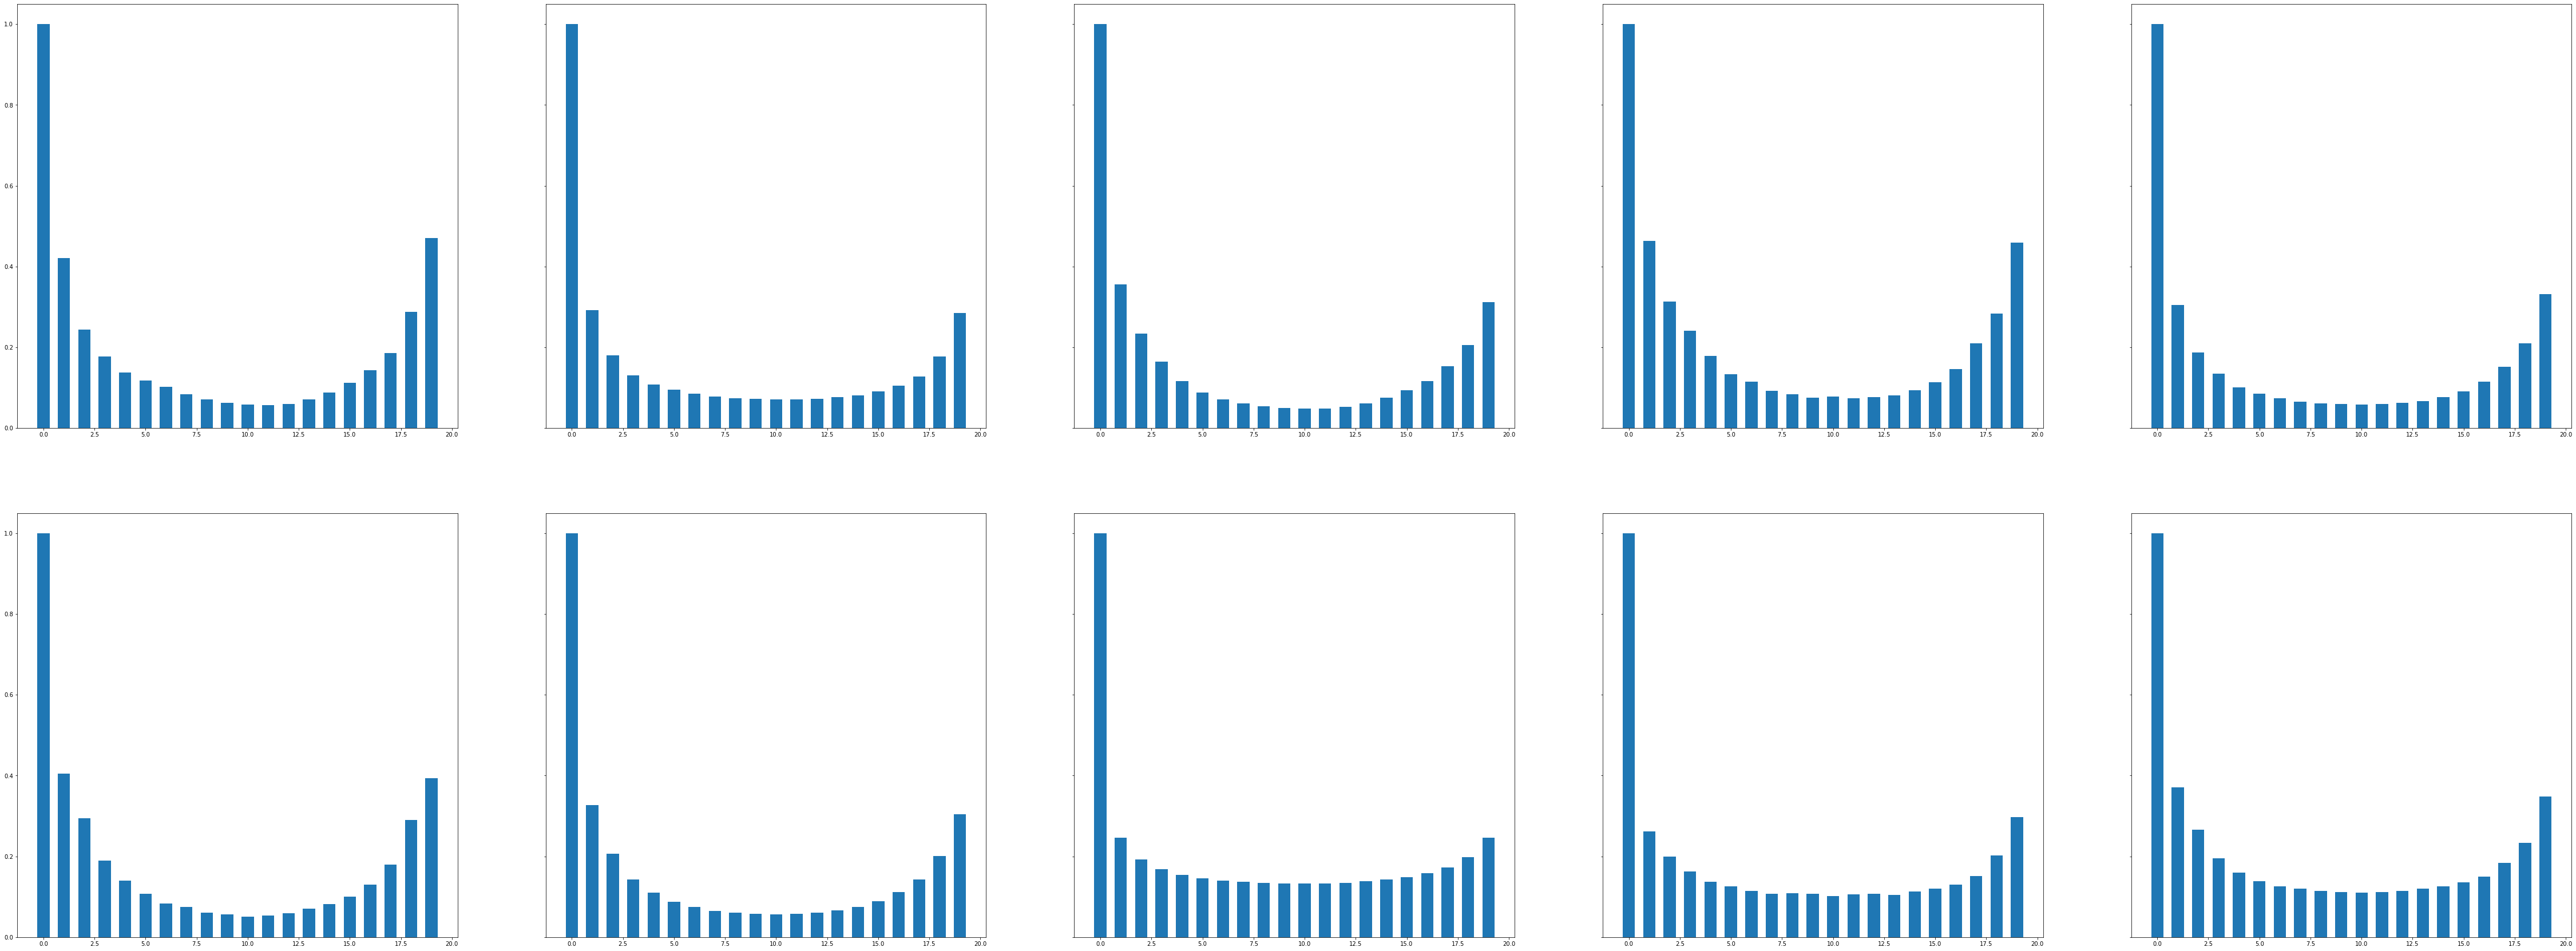

In [28]:
#FFT Not normalized - (don't touch -overwritten data!!)
fig,ax = plt.subplots(2,5, sharey= True, figsize = (80,30) )
for j in range(5):
    ht = C_bins[j]
    ind = list(range(len(ht)))
    ax[0][j].bar(ind, ht, width=0.6)

for j in range(5):
    ht = D_bins[j]
    ind = list(range(len(ht)))
    ax[1][j].bar(ind, ht, width=0.6)
    
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

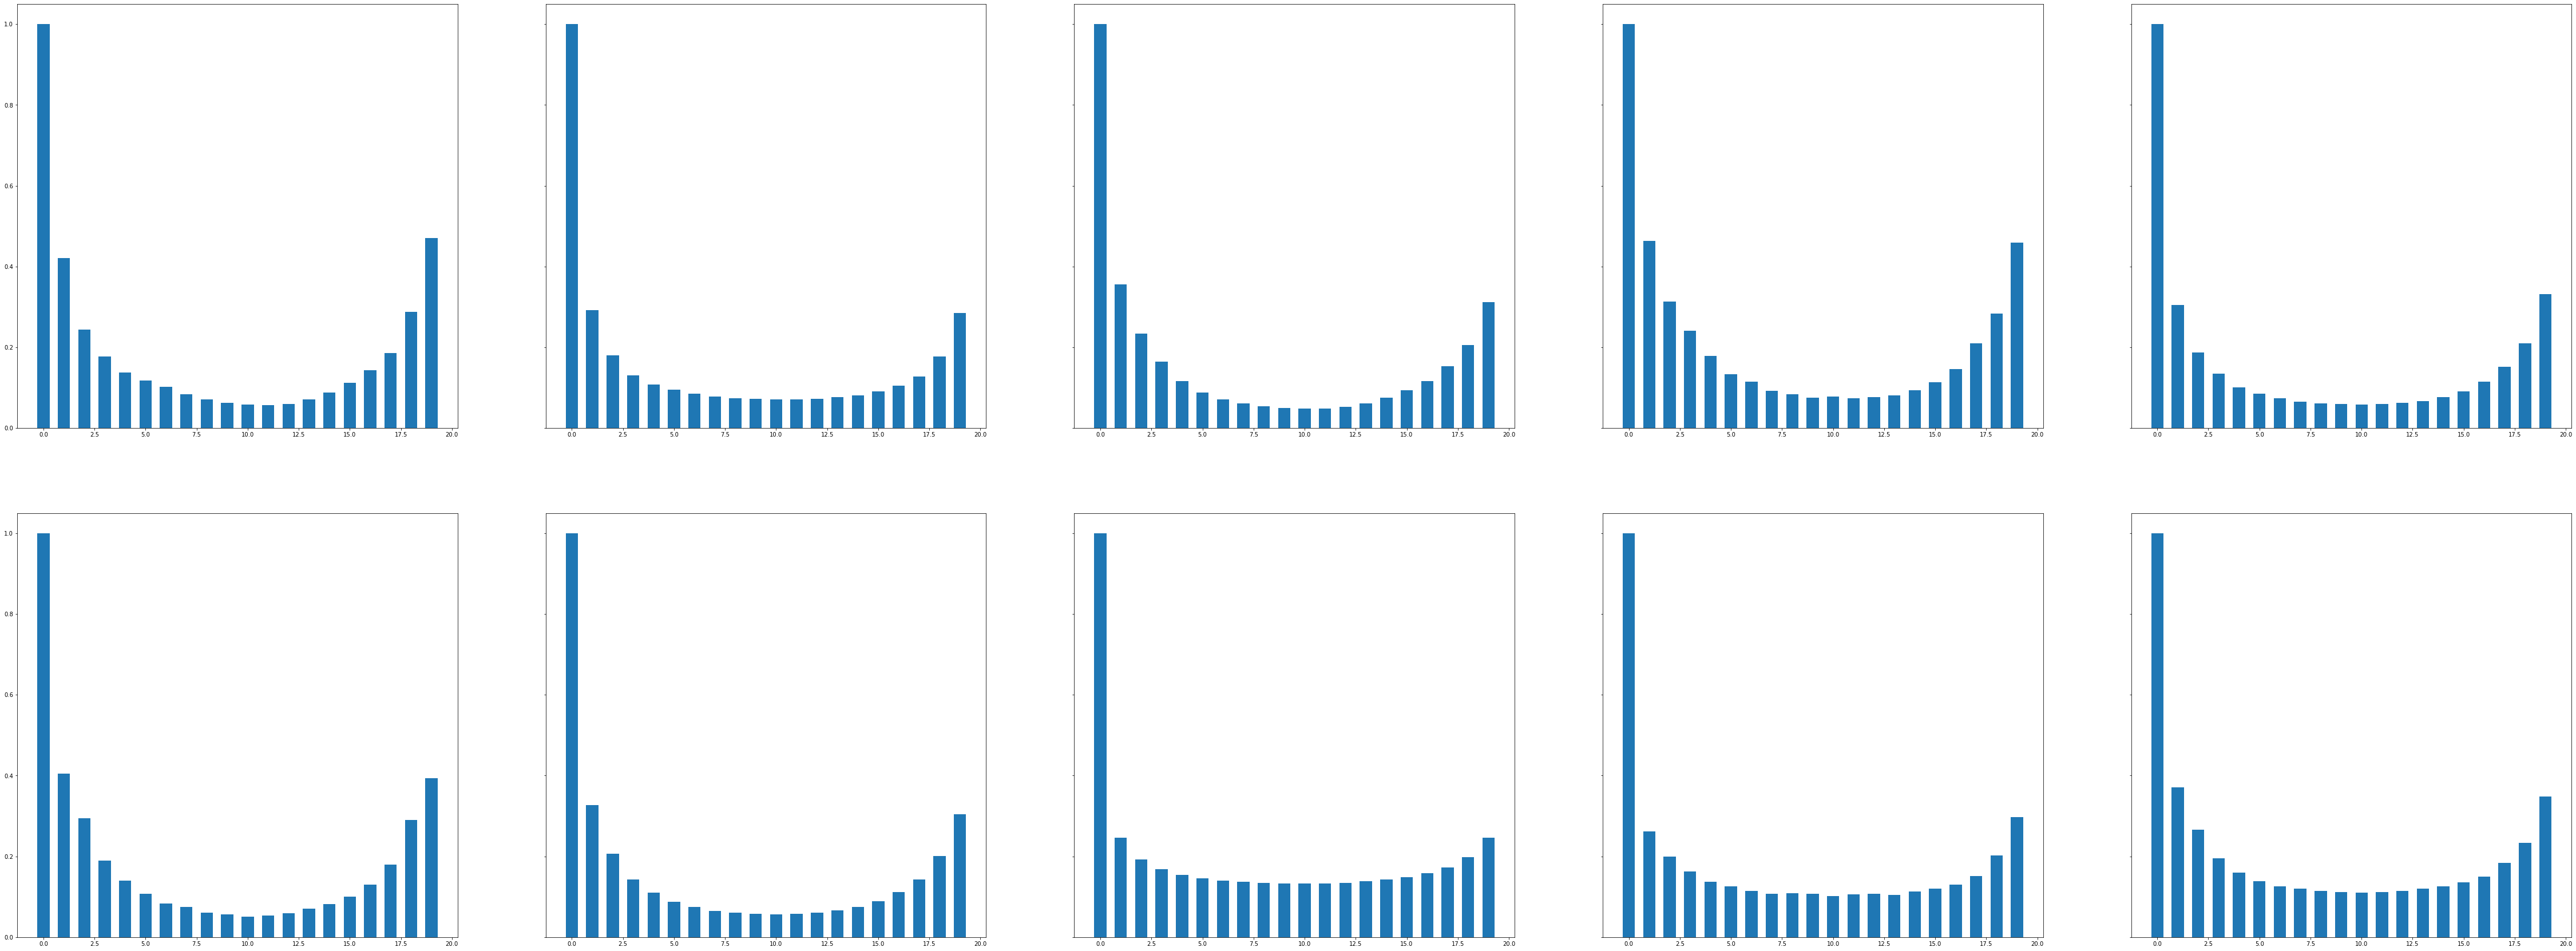

In [30]:
#FFT Normalized
fig,ax = plt.subplots(2,5, sharey= True, figsize = (80,30) )
for j in range(5):
    ht = C_bins[j]
    ind = list(range(len(ht)))
    ax[0][j].bar(ind, ht, width=0.6)

for j in range(5):
    ht = D_bins[j]
    ind = list(range(len(ht)))
    ax[1][j].bar(ind, ht, width=0.6)
    
plt.show